# Day 04 - Mini Projeto Walmart
## Turma Dex07
## Michel Souza Santana - 13923

## Contextualização
* Você foi contratado pelo Walmart para fazer um levantamento do 
faturamento das lojas nos USA e apontar qual loja seria melhor para 
expandir seu tamanho.
* É preciso analisar as vendas semanais de cada loja, calcular algumas 
informações importantes que serão perguntadas e ao final de tudo, indicar 
em qual loja deva ser investida.


## Walmart Inc.
* Walmart, Inc., é uma multinacional estadunidense de lojas de 
departamento. 
* A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de 
outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. 
* No ano de 2021, obteve um um lucro de $13.51 Bilhões.
* Sendo uma das principais lojas de varejo do mundo, os dados contemplam 
as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. 
* O Walmart realiza vários eventos promocionais de descontos ao longo do 
ano. 
* Essas remarcações precedem feriados importantes, os quatro maiores de 
todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o 
Natal. 
* As semanas que incluem esses feriados têm um peso maior.

## O Que Devo Fazer?
* A empresa te contratou para fazer um levantamento do 
faturamento das lojas nos USA e apontar qual loja seria melhor para 
expandir seu tamanho.
* Você deve montar um colab bem redigido mostrando o passo a 
passo das etapas de análise do case, fazendo uma introdução e dados 
atuais sobre o problema.
* Também é importante ressaltar/explicar passagens complexas 
ou insights que você tiver durante a resolução desse projeto.

> Importando as bibliotecas

In [1482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> Carregando o DF

In [1483]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


* Foram escolhidas com variáveis para análise as colunas Store, Weekly_Sales, CPI e Unemployment.
* As demais foram descartadas pois não interferem diretamente sobre o resultado na análise do poder de venda das lojas.

> Verificando o tamanho da tabela

In [1484]:
df.shape

(6435, 8)

> Analisando as variáveis

In [1485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


> Formatando o campo date

In [1486]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

c:\Users\miche\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\miche\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\miche\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\miche\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


Verificando as variáveis

In [1487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Convertendo os cabeçalhos em minusulas para facilitar a manipulação

In [1488]:
df.columns = df.columns.str.lower()
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


* Aqui estarei criando uma nova coluna para ratificar os dados por ano.

In [1489]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [1490]:
df['year'].unique()

array([2010, 2011, 2012], dtype=int64)

> Verificando a presença de nulos no DF

In [1491]:
df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
year            0
dtype: int64

> Separando os resultados por ano para ter as 5 melhores lojas de cada ano e analisar seu desempenho. Ao fim da análise pretende-se ter as 5 lojas com melhor desempenho no três anos registrados e desta destacar a melhor.

In [1492]:
df_2010 = df[df['year'] == 2010]
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]

## Iniciando a análise das 5 melhores lojas em 2010

In [1493]:
df_2010.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010


> Agrupando os valores por loja (store) e eliminando as colunas que não inferem diretamente na análise final sobre a capacidade de vendas de cada loja

In [1494]:
df_2010 = df_2010.groupby(by=['store']).sum().drop(columns=['temperature', 'year', 'holiday_flag']).reset_index()

> Nova tabela sem as colunas temperature, year e holiday_flag.

In [1495]:
df_2010.head()

,store,weekly_sales,fuel_price,cpi,unemployment
0,1,73278832.00,129.449,10142.676485,377.315
1,2,95277864.19,129.449,10126.253783,392.761
2,3,18745419.00,129.449,10301.695751,355.797
3,4,95680470.81,129.931,6066.353364,367.246
4,5,14836030.77,129.449,10169.316311,315.773


> verificando o tamanho da tabela

In [1496]:
df_2010.shape

(45, 5)

> Analisando os valores do DF

In [1497]:
df_2010.describe()

,store,weekly_sales,fuel_price,cpi,unemployment
count,45.000000,4.500000e+01,45.000000,45.000000,45.000000
mean,23.000000,5.086414e+07,135.540822,8068.885513,407.650289
std,13.133926,2.678384e+07,6.393523,1854.866085,89.731350
min,1.000000,1.276683e+07,127.620000,6066.353364,261.047000
25%,12.000000,2.556808e+07,129.449000,6355.819671,367.246000
50%,23.000000,4.837038e+07,135.880000,8752.684689,392.761000
75%,34.000000,6.689065e+07,137.755000,10083.462160,433.770000
max,45.000000,1.054622e+08,147.048000,10312.711543,679.809000


> Alocando a média das vendas em uma variável

In [1498]:
df_2010_media = int(df_2010['weekly_sales'].mean())
df_2010_media

50864136

> Pegando as lojas que venderam acima da média

In [1499]:
df_2010_m = df_2010[df_2010['weekly_sales'] > df_2010_media]
df_2010_m.head()

,store,weekly_sales,fuel_price,cpi,unemployment
0,1,73278832.00,129.449,10142.676485,377.315
1,2,95277864.19,129.449,10126.253783,392.761
3,4,95680470.81,129.931,6066.353364,367.246
5,6,76912320.69,129.449,10215.580406,339.015
9,10,94472202.21,145.862,6066.353364,447.561


Alocando a média da cpi em uma variável

In [1500]:
cpi_mean = int(df_2010_m['cpi'].mean())
cpi_mean

7958

> Alocando a média da unemployment em uma variável

In [1501]:
unemployment_mean = int(df_2010_m['unemployment'].mean())
unemployment_mean

401

* Aqui, estarei criando duas váriáveis para que dentre as lojas que mais venderam venhamos a filtrar ao mesmo tempo as que conseguiram manter o menor íncide acumulado de preços ao consumidor (cpi) e as que se localisão em regiões com as menores taxas de desemprego (unemployment), visto que tais ocorrências interferem diretamente no poder de compra do consumidor.

In [1502]:
filter_weekly_sales = df_2010_m['cpi'] < cpi_mean
filter_unemployment = df_2010_m['unemployment'] < unemployment_mean

In [1503]:
df_lojas_seletas_2010 = df_2010_m[filter_weekly_sales & filter_unemployment]
df_lojas_seletas_2010.sort_values(by=['weekly_sales'], ascending=False).reset_index().drop(columns=['index'])

,store,weekly_sales,fuel_price,cpi,unemployment
0,4,95680470.81,129.931,6066.353364,367.246
1,13,95272735.45,135.880,6066.353364,384.412
2,27,90013176.57,144.157,6540.787495,386.710
3,19,72580528.64,144.157,6355.819671,391.430
4,23,67709105.31,137.755,6355.819671,261.047
5,24,66890648.24,144.157,6355.819671,394.722


In [1504]:
df_lojas_seletas_2010['year'] = int(2010)
df_lojas_seletas_2010

C:\Users\miche\AppData\Local\Temp\ipykernel_14148\3631133476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lojas_seletas_2010['year'] = int(2010)


,store,weekly_sales,fuel_price,cpi,unemployment,year
3,4,95680470.81,129.931,6066.353364,367.246,2010
12,13,95272735.45,135.880,6066.353364,384.412,2010
18,19,72580528.64,144.157,6355.819671,391.430,2010
22,23,67709105.31,137.755,6355.819671,261.047,2010
23,24,66890648.24,144.157,6355.819671,394.722,2010
26,27,90013176.57,144.157,6540.787495,386.710,2010


## Iniciando a análise das 5 melhores lojas em 2011

In [1505]:
df_2011.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
48,1,2011-07-01,1444732.28,0,48.27,2.976,211.404742,7.742,2011
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742,2011
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,2011
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,2011
52,1,2011-04-02,1606629.58,0,42.27,2.989,212.566881,7.742,2011


In [1506]:
df_2011 = df_2011.groupby(by=['store']).sum().drop(columns=['temperature', 'year', 'holiday_flag']).reset_index()

In [1507]:
df_2011.shape

(45, 5)

In [1508]:
df_2011.describe()

,store,weekly_sales,fuel_price,cpi,unemployment
count,45.000000,4.500000e+01,45.000000,45.000000,45.000000
mean,23.000000,5.440444e+07,185.219578,8920.377231,420.265867
std,13.133926,2.859260e+07,7.518402,2048.237735,97.955034
min,1.000000,1.295784e+07,177.342000,6709.679444,245.157000
25%,12.000000,2.911730e+07,178.321000,7029.982387,362.523000
50%,23.000000,5.036018e+07,180.167000,9677.898452,406.100000
75%,34.000000,7.416923e+07,190.615000,11148.253501,444.910000
max,45.000000,1.110923e+08,197.804000,11401.365978,703.432000


In [1509]:
df_2011_media = int(df_2011['weekly_sales'].mean())
df_2011_media

54404444

In [1510]:
df_2011_m = df_2011[df_2011['weekly_sales'] > df_2011_media]
df_2011_m.head()

,store,weekly_sales,fuel_price,cpi,unemployment
0,1,8.092192e+07,178.321,11213.699338,406.496
1,2,9.860788e+07,178.321,11195.573703,406.100
3,4,1.110923e+08,178.008,6709.679444,301.293
5,6,8.052876e+07,178.321,11294.162944,353.524
9,10,9.891689e+07,194.090,6709.679444,433.310


In [1511]:
cpi_mean = int(df_2011_m['cpi'].mean())
cpi_mean

9070

In [1512]:
unemployment_mean = int(df_2011_m['unemployment'].mean())
unemployment_mean

405

In [1513]:
filter_weekly_sales = df_2011_m['cpi'] < cpi_mean
filter_unemployment = df_2011_m['unemployment'] < unemployment_mean

In [1514]:
df_lojas_seletas_2011 = df_2011_m[filter_weekly_sales & filter_unemployment]
df_lojas_seletas_2011.sort_values(by=['weekly_sales'], ascending=False).reset_index().drop(columns=['index'])

,store,weekly_sales,fuel_price,cpi,unemployment
0,4,1.110923e+08,178.008,6709.679444,301.293
1,13,1.045375e+08,180.167,6709.679444,362.523
2,19,7.484190e+07,197.804,7029.982387,404.348
3,23,7.227353e+07,190.615,7029.982387,245.157


In [1515]:
df_lojas_seletas_2011['year'] = int(2011)

C:\Users\miche\AppData\Local\Temp\ipykernel_14148\447865270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lojas_seletas_2011['year'] = int(2011)


In [1516]:
df_lojas_seletas_2011

,store,weekly_sales,fuel_price,cpi,unemployment,year
3,4,1.110923e+08,178.008,6709.679444,301.293,2011
12,13,1.045375e+08,180.167,6709.679444,362.523,2011
18,19,7.484190e+07,197.804,7029.982387,404.348,2011
22,23,7.227353e+07,190.615,7029.982387,245.157,2011


## Iniciando a análise das 5 melhores lojas em 2012

In [1517]:
df_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012


In [1518]:
df_2012 = df_2012.groupby(by=['store']).sum().drop(columns=['temperature', 'year', 'holiday_flag']).reset_index()

In [1519]:
df_2012.shape

(45, 5)

In [1520]:
df_2012.describe()

,store,weekly_sales,fuel_price,cpi,unemployment
count,45.000000,4.500000e+01,45.000000,45.000000,45.000000
mean,23.000000,4.444740e+07,159.520378,7546.447577,315.962444
std,13.133926,2.301909e+07,7.671088,1768.338925,73.038617
min,1.000000,1.143555e+07,152.088000,5625.159924,179.626000
25%,12.000000,2.482753e+07,152.647000,5932.440790,279.164000
50%,23.000000,4.173916e+07,153.872000,8208.268819,307.112000
75%,34.000000,5.921243e+07,163.799000,9474.541246,350.513000
max,45.000000,9.277119e+07,172.978000,9692.539036,492.416000


In [1521]:
df_2012_media = int(df_2012['weekly_sales'].mean())
df_2012_media

44447396

In [1522]:
df_2012_m = df_2012[df_2012['weekly_sales'] > df_2012_media]
df_2012_m.head()

,store,weekly_sales,fuel_price,cpi,unemployment
0,1,68202058.02,152.647,9531.179699,304.479
1,2,81496695.37,152.647,9515.594934,291.349
3,4,92771189.24,152.088,5625.159924,184.412
5,6,66315047.00,152.647,9600.363832,252.248
9,10,78228616.94,171.405,5625.159924,315.033


In [1523]:
cpi_mean = int(df_2012_m['cpi'].mean())
cpi_mean

7583

In [1524]:
unemployment_mean = int(df_2012_m['unemployment'].mean())
unemployment_mean

309

In [1525]:
filter_weekly_sales = df_2012_m['cpi'] < cpi_mean
filter_unemployment = df_2012_m['unemployment'] < unemployment_mean

In [1526]:
df_lojas_seletas_2012 = df_2012_m[filter_weekly_sales & filter_unemployment]
df_lojas_seletas_2012.sort_values(by=['weekly_sales'], ascending=False).reset_index().drop(columns=['index'])

,store,weekly_sales,fuel_price,cpi,unemployment
0,4,92771189.24,152.088,5625.159924,184.412
1,13,86707455.02,153.872,5625.159924,254.326
2,23,58767978.75,163.799,5932.440790,179.626


In [1527]:
df_lojas_seletas_2012['year'] = int(2012)

C:\Users\miche\AppData\Local\Temp\ipykernel_14148\1718594687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lojas_seletas_2012['year'] = int(2012)


In [1528]:
df_lojas_seletas_2012

,store,weekly_sales,fuel_price,cpi,unemployment,year
3,4,92771189.24,152.088,5625.159924,184.412,2012
12,13,86707455.02,153.872,5625.159924,254.326,2012
22,23,58767978.75,163.799,5932.440790,179.626,2012


## Selecionando Loja

In [1529]:
loja_seleta = pd.concat([df_lojas_seletas_2010, df_lojas_seletas_2011, df_lojas_seletas_2012]).reset_index().drop(columns=['index'])
loja_seleta

,store,weekly_sales,fuel_price,cpi,unemployment,year
0,4,9.568047e+07,129.931,6066.353364,367.246,2010
1,13,9.527274e+07,135.880,6066.353364,384.412,2010
2,19,7.258053e+07,144.157,6355.819671,391.430,2010
3,23,6.770911e+07,137.755,6355.819671,261.047,2010
4,24,6.689065e+07,144.157,6355.819671,394.722,2010
5,27,9.001318e+07,144.157,6540.787495,386.710,2010
6,4,1.110923e+08,178.008,6709.679444,301.293,2011
7,13,1.045375e+08,180.167,6709.679444,362.523,2011
8,19,7.484190e+07,197.804,7029.982387,404.348,2011
9,23,7.227353e+07,190.615,7029.982387,245.157,2011


In [1530]:
loja_seleta['store'].value_counts()

4     3
13    3
23    3
19    2
24    1
27    1
Name: store, dtype: int64

In [1531]:
loja_seleta_4 = loja_seleta[loja_seleta['store'] == 4]

<AxesSubplot:xlabel='year'>

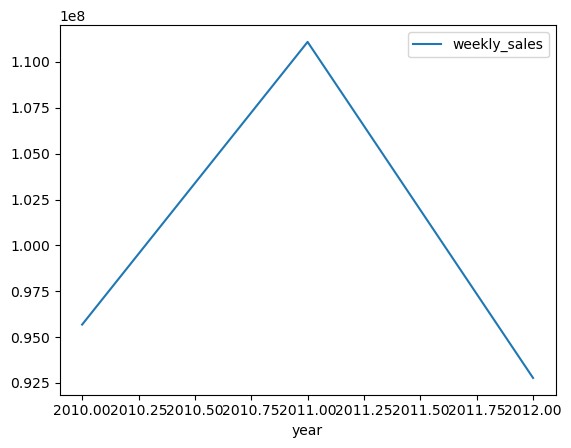

In [1532]:
loja_seleta_4.plot('year', 'weekly_sales')

In [1533]:
loja_seleta_13 = loja_seleta[loja_seleta['store'] == 13]

<AxesSubplot:xlabel='year'>

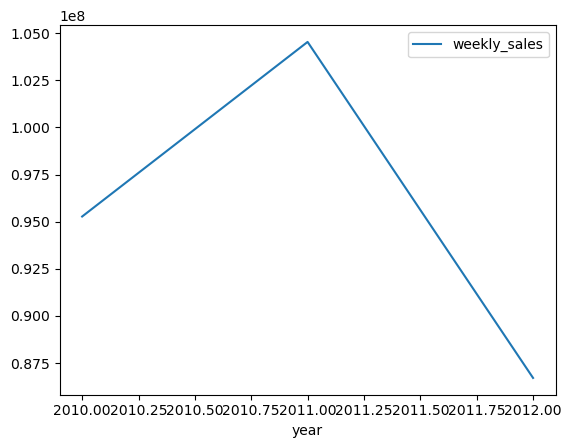

In [1534]:
loja_seleta_13.plot('year', 'weekly_sales')

In [1535]:
loja_seleta_23 = loja_seleta[loja_seleta['store'] == 23]

<AxesSubplot:xlabel='year'>

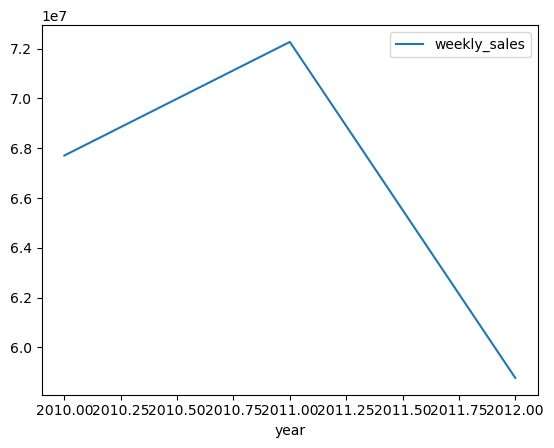

In [1536]:
loja_seleta_23.plot('year', 'weekly_sales')

<AxesSubplot:xlabel='store'>

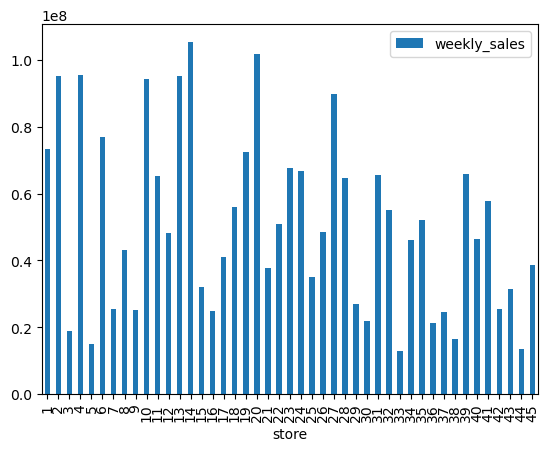

In [1537]:
df_2010.plot.bar('store', 'weekly_sales')

<AxesSubplot:xlabel='store'>

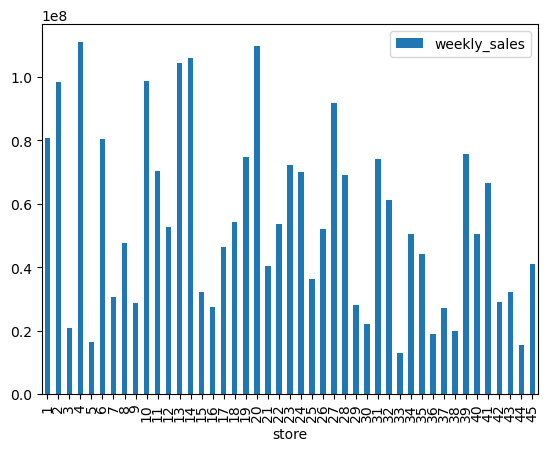

In [1538]:
df_2011.plot.bar('store', 'weekly_sales')

Text(0.5, 1.0, 'Grafico 2012')

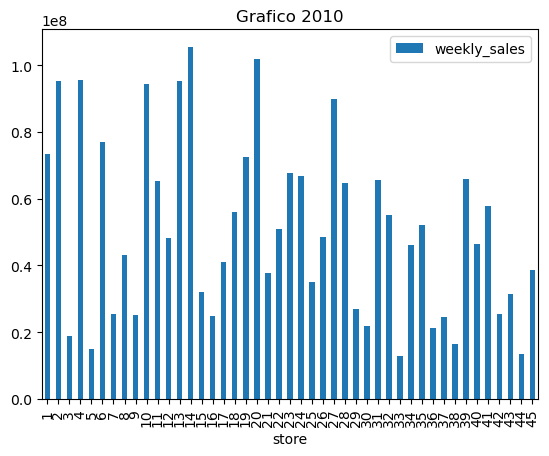

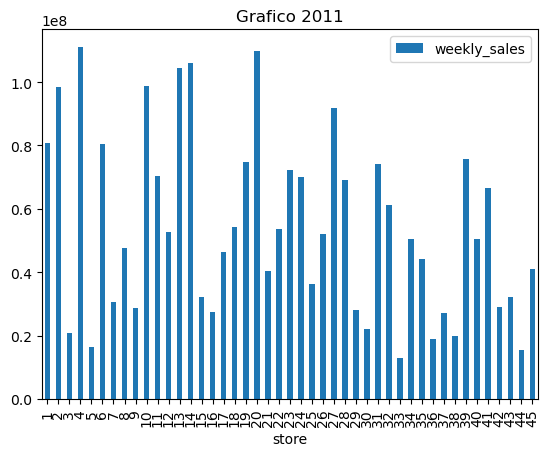

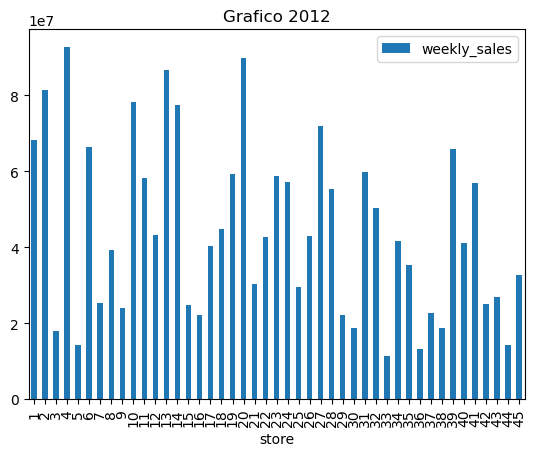

In [1539]:
df_2010.plot.bar('store', 'weekly_sales')
plt.title('Grafico 2010')
df_2011.plot.bar('store', 'weekly_sales')
plt.title('Grafico 2011')
df_2012.plot.bar('store', 'weekly_sales')
plt.title('Grafico 2012')

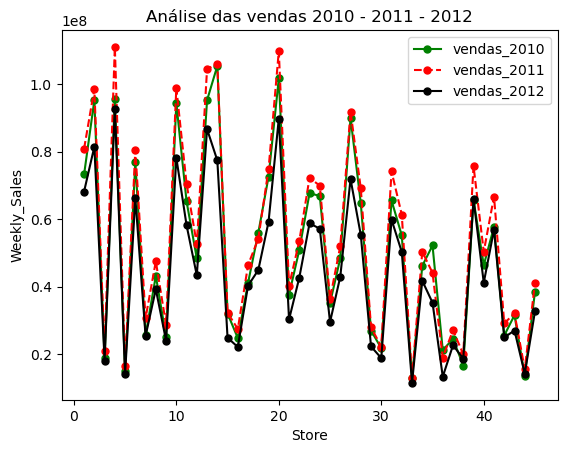

In [1556]:
vendas_2010 = df_2010['store']
vendas_2010_y = df_2010['weekly_sales']

vendas_2011 = df_2011['store']
vendas_2011_y = df_2011['weekly_sales']

vendas_2012 = df_2012['store']
vendas_2012_y = df_2012['weekly_sales']
  
plt.plot(vendas_2010,vendas_2010_y, color ='g', 
         label ='vendas_2010',  marker ='o', markersize = 5)

plt.plot(vendas_2011,vendas_2011_y, color ='r', 
         label ='vendas_2011', marker ='o', markersize = 5,)

plt.plot(vendas_2012,vendas_2012_y, color ='k', 
         label ='vendas_2012', marker ='o', markersize = 5)
  
# naming of x-axis and y-axis
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
  
# naming the title of the plot
plt.title('Análise das vendas 2010 - 2011 - 2012')
  
plt.legend()
plt.show()